In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from skimage.transform import rotate
import pims, sys
from pathlib import Path
from scipy.interpolate import UnivariateSpline
#sys.path.insert(0, r'C:\\Warwick\\Jerko_Code_And_Docs\\Manuscript Code')
sys.path.insert(0, r'/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Manuscript_Code/')
from Filament_Analysis.geometric_2 import SimpleSpline
from pathlib import Path
import pandas as pd
import trackpy as tp

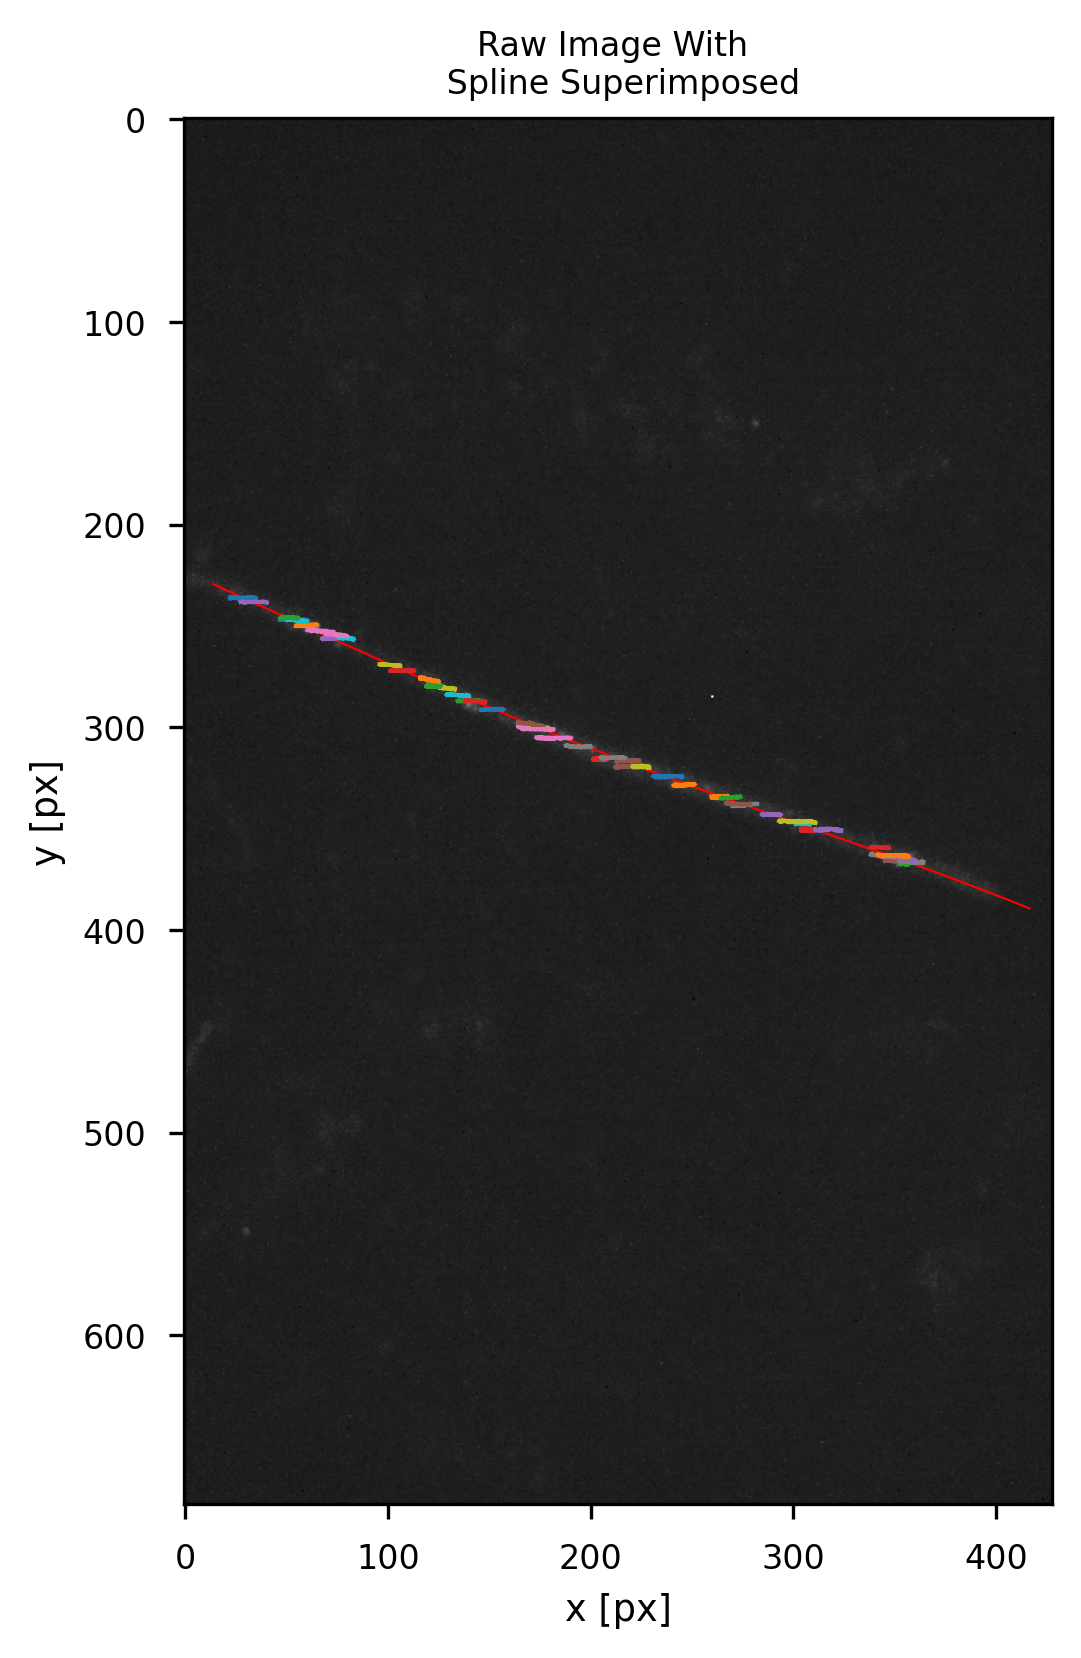

In [23]:
#base_path = Path(r'C:\Users\jrosk\Dropbox\Warwick\TIRF\29-11-2022\Measurements')
base_path = Path(r'/Volumes/shared/Shared279/OSSLAB_data/microscopy_data/Jerko/TIRF/29-11-2022/Measurements')

file_path = base_path.joinpath(r'29-Nov-22_Todays_Sample_TIRF_473.tif')
#tracks_path =r'C:\Warwick\Code\Image_Analysis\Jupyter-Notebooks\Filament_Axes\22-02-2023\Analysis\29_Nov_22_TIRF473\tracks\29-Nov-22_Todays_Sample_TIRF_473.csv'
tracks_path = Path('/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Manuscript_Code/Jupyter_Notebooks/Analysis/TIRF/29_Nov_22_TIRF473/tracks/29-Nov-22_Todays_Sample_TIRF_473.csv')
tracks_path_base = Path('/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Manuscript_Code/Jupyter_Notebooks/Analysis/TIRF/29_Nov_22_TIRF473')

# Create a SimpleSpline object containing the filament axis
axis_path = Path('/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Manuscript_Code/Jupyter_Notebooks/Analysis/TIRF/29_Nov_22_TIRF473/splines/spline_0.txt')
axis = SimpleSpline.from_csv(axis_path, 0.01)

spline_top = axis.shift_spline(-0.25)
spline_top = spline_top[1000:-1000,:]


@pims.pipeline
def green_channel(frame):
    return frame[:,0:428]

both_channels = pims.open(file_path.as_posix())

# Apply pipeline
images_green = green_channel(both_channels)


df = pd.read_csv(tracks_path)
df = df[df['x']< 380] # not good match with spline

# Visualise the spline
with plt.style.context('seaborn-v0_8-paper'):
    fig , ax = plt.subplots(1,1, figsize=(6,6), dpi=300)
    ylim = (images_green[0].shape[0],200)
    ax.imshow(-images_green[0], cmap='Greys')
    ax.plot(spline_top[:,0], spline_top[:,1], color='red', linewidth = 0.5)
    ax.set_title('Raw Image With \n Spline Superimposed', fontsize=8)
    tp.plot_traj(df)
    plt.show()


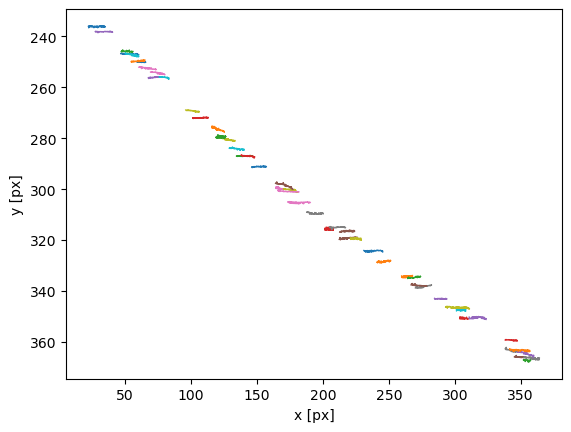

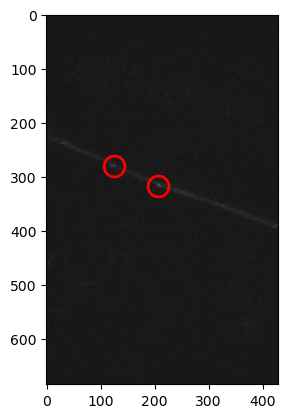

<AxesSubplot:>

In [14]:
plt.figure()
tp.plot_traj(df)
tp.annotate(df[df['frame'] == 800], images_green[800])

In [15]:
spline_top_fit = UnivariateSpline(spline_top[:,0], spline_top[:,1],k=5)
x_axis = np.arange(spline_top[0,0], spline_top[-1,0], 0.01)
spline_top_obj = SimpleSpline(0.01, x_axis, spline_top_fit(x_axis), spline_top_fit.derivative(), spline_object=spline_top_fit)

df[['height', 'distance']] = df.apply(lambda row: pd.Series(spline_top_obj.transform_coordinates(
        row['x'], row['y'], distance_from='head'), index=['height', 'distance']), axis=1)

df_cropped = df.groupby('particle').filter(lambda group: (group['height'].min() < -2) & (group['height'].max() > 2))

In [16]:
df_cropped.head(100)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,experiment,height,distance
587,338.808506,270.108454,333.138094,1.189857,0.066277,56.423378,7756.0,0.015989,312,848,29-Nov-22_Todays_Sample_TIRF_473,-2.449098,278.896944
588,338.816096,270.256050,386.459851,1.239196,0.107212,61.628527,7944.0,0.013918,313,848,29-Nov-22_Todays_Sample_TIRF_473,-2.406960,279.038514
589,338.235994,270.694308,381.169034,1.224541,0.083045,60.431535,8164.0,0.012954,314,848,29-Nov-22_Todays_Sample_TIRF_473,-1.713810,279.257790
590,338.236642,270.745080,377.306439,1.230128,0.104320,59.915054,8043.0,0.014094,315,848,29-Nov-22_Todays_Sample_TIRF_473,-1.697468,279.305844
591,338.696273,270.806704,385.624562,1.197791,0.132516,67.587953,8134.0,0.012884,317,848,29-Nov-22_Todays_Sample_TIRF_473,-2.110151,279.517286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,337.748355,282.204793,327.601672,1.165738,0.153020,58.755287,7719.0,0.014995,419,848,29-Nov-22_Todays_Sample_TIRF_473,2.575889,289.951016
989,272.095236,101.172788,185.524751,1.102513,0.227815,36.940490,6502.0,0.028881,432,1212,29-Nov-22_Todays_Sample_TIRF_473,-2.750377,97.415408
993,272.083744,101.293892,183.956156,1.133303,0.190772,33.396028,6482.0,0.029335,433,1212,29-Nov-22_Todays_Sample_TIRF_473,-2.690803,97.521373
995,271.924496,101.786663,172.724778,1.190745,0.348796,28.972966,6488.0,0.029588,434,1212,29-Nov-22_Todays_Sample_TIRF_473,-2.345587,97.907064


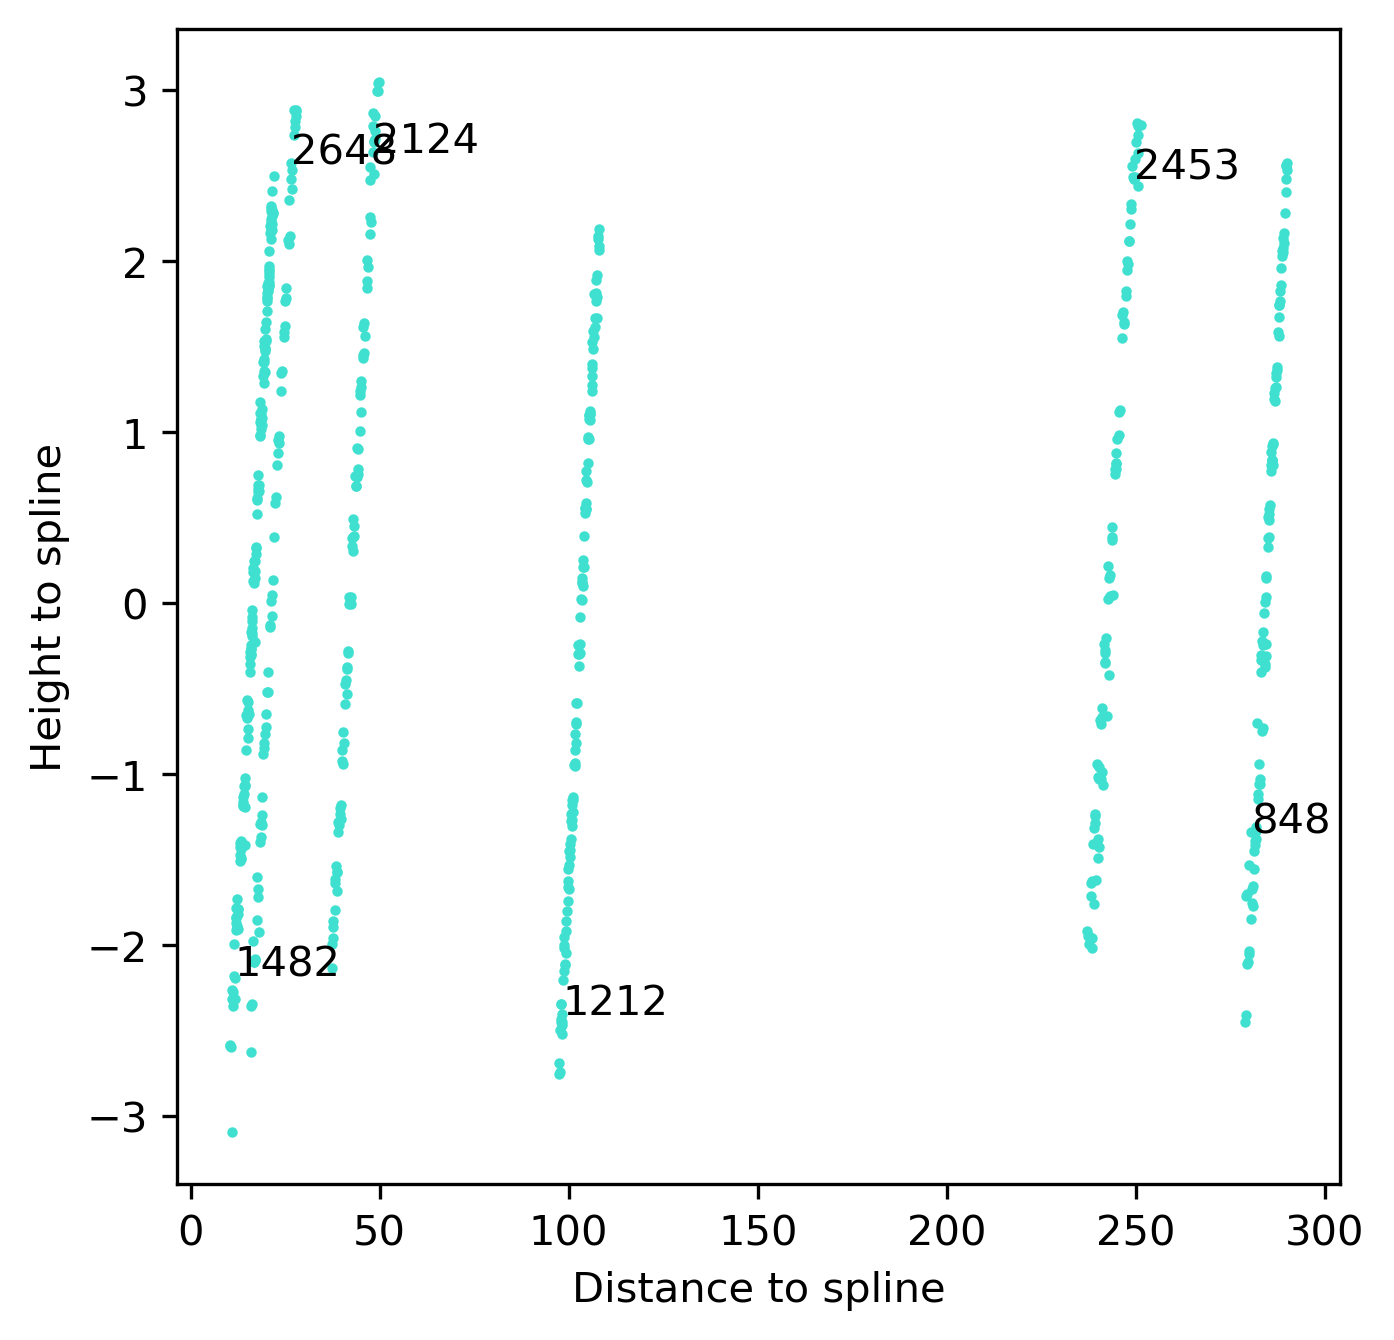

In [17]:
fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=300)
test = df_cropped.dropna()
#test = df.dropna()

#test = test[test['angle']>27]
for k,particle in enumerate(test['particle'].unique()):
    x = test.loc[ test['particle'] == particle]['distance']
    y =  test.loc[ test['particle'] == particle]['height']

    ax.plot(x[::1], y[::1], '.', color='turquoise', markersize=3)
    ax.annotate(particle, (x.values[10], y.values[10]))
ax.set_xlabel('Distance to spline')
ax.set_ylabel('Height to spline')
plt.show()

In [25]:
#df_cropped.to_csv(f'tracks/{file_path.stem}_filtered.csv', index=False)
df_cropped.to_csv(tracks_path_base.joinpath(f'tracks/{file_path.stem}_filtered.csv'), index=False)
df.to_csv(tracks_path_base.joinpath(f'tracks/{file_path.stem}_Nonfiltered_OSS.csv'), index=False)